# Hadist Multilabel RNN

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU,SimpleRNN
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


## Processing the data

In [2]:
# reading data
df = pd.read_excel('Multilabel.xlsx')
df[:10]

,Data,Anjuran,Larangan,Informasi,Bab Kitab
0,"Semua perbuatan tergantung niatnya, dan (balas...",0,0,1,1
1,Terkadang datang kepadaku seperti suara gemeri...,0,0,1,1
2,Bacalah? Beliau menjawab: Aku tidak bisa baca....,0,0,1,1
3,sangat kuat keinginannya untuk menghafalkan ap...,0,1,1,1
4,manusia yang paling lembut terutama pada bulan...,0,0,1,1
5,"Dari Muhammad, hamba Allah dan Rasul-Nya untuk...",1,1,1,1
6,Islam dibangun diatas lima (landasan); persaks...,0,0,1,2
7,"Iman memiliki lebih dari enam puluh cabang, da...",0,0,1,2
8,Seorang muslim adalah orang yang Kaum Muslimin...,0,1,1,2
9,Siapa yang Kaum Muslimin selamat dari lisan da...,0,0,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
Data         1064 non-null object
Anjuran      1064 non-null int64
Larangan     1064 non-null int64
Informasi    1064 non-null int64
Bab Kitab    1064 non-null int64
dtypes: int64(4), object(1)
memory usage: 41.6+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of false and true anjuran information')

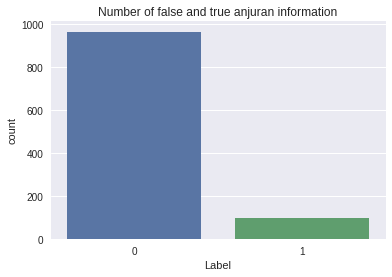

In [4]:
sns.countplot(df.Larangan)
plt.xlabel('Label')
plt.title('Number of false and true anjuran information')

### Initialize the data


In [0]:
X = df.Data.str.lower()
Y1 = df.Anjuran
Y2 = df.Larangan
Y3 = df.Informasi
le = LabelEncoder()

# Y1 = le.fit_transform(Y1)
# Y1 = Y1.reshape(-1,1)
Y1 = Y1.values.reshape([-1,1])

# Y2 = le.fit_transform(Y2)
# Y2 = Y2.reshape(-1,1)
Y2 = Y2.values.reshape([-1,1])

# Y3 = le.fit_transform(Y3)
# Y3 = Y3.reshape(-1,1)
Y3 = Y3.values.reshape([-1,1])

### Split the data

In [0]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X,Y1,test_size=0.20,shuffle=False)
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X,Y2,test_size=0.20,shuffle=False)
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X,Y3,test_size=0.20,shuffle=False)

### Preprocess data

#### Without preprocess data

In [0]:
# Ajuran
max_words = 5000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X1_train)
sequences = tok.texts_to_sequences(X1_train)
sequences_matrix1 = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
# larangan
max_words = 5000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X2_train)
sequences = tok.texts_to_sequences(X2_train)
sequences_matrix2 = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
# Informasi
max_words = 5000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X3_train)
sequences = tok.texts_to_sequences(X3_train)
sequences_matrix3 = sequence.pad_sequences(sequences,maxlen=max_len)

In [10]:
sequences_matrix3[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  543,   81,  111,   47,  259, 2424, 2425,    1,  272,
         32,    2,  195,  654,  655,   10, 1311,  154,    3,  126,  929,
         48,    2,  930,    1,  543,   81,  188, 1700,   40,   59,   59,
         10,  498,  111,    7,    3, 1701,   48,    2, 1312,  499,   11,
        100,    3,   49,   53, 2426,  597,   17,    5,   25,  120,   68,
          2,  260,  598,   10, 1311,    1,    3,  376, 1313,    5, 2427,
        931], dtype=int32)

## Build RNN

### Simple RNN

In [0]:
from keras.models import Sequential
def simpleRNN():
    model = Sequential()
    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(SimpleRNN(64, init='uniform'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [12]:
modelSimple1 = simpleRNN()
modelSimple1.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                7360      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 257,425
Trainable params: 257,425
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(64, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [13]:
modelSimple2 = simpleRNN()
modelSimple2.summary()
# model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(64, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                7360      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 257,425
Trainable params: 257,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
modelSimple3 = simpleRNN()
modelSimple3.summary()
# model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                7360      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 257,425
Trainable params: 257,425
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(64, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


### LSTM RNN

In [0]:
from keras.models import Sequential
def lstmRNN():
    model = Sequential()
    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(LSTM(64, init='uniform'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [16]:
modelLSTM1 = lstmRNN()
modelLSTM1.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 279,505
Trainable params: 279,505
Non-trainable params: 0
_________________________________________________________________


In [17]:
modelLSTM2 = lstmRNN()
modelLSTM2.summary()
# model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, kernel_initializer="uniform")`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 279,505
Trainable params: 279,505
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [18]:
modelLSTM3 = lstmRNN()
modelLSTM3.summary()
# model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, kernel_initializer="uniform")`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 279,505
Trainable params: 279,505
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


### GRU RNN

In [0]:
from keras.models import Sequential
def gruRNN():
    model = Sequential()
    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(GRU(64, init='uniform'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
modelGRU1 = gruRNN()
modelGRU1.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(64, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                22080     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 272,145
Trainable params: 272,145
Non-trainable params: 0
_________________________________________________________________


In [21]:
modelGRU2 = gruRNN()
modelGRU2.summary()
# model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(64, kernel_initializer="uniform")`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                22080     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 272,145
Trainable params: 272,145
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [22]:
modelGRU3 = gruRNN()
modelGRU3.summary()
# model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(64, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                22080     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 272,145
Trainable params: 272,145
Non-trainable params: 0
_________________________________________________________________


## Build Model

### Train the data with Simple RNN

In [23]:
modelSimple1.fit(sequences_matrix1,Y1_train,batch_size=128,epochs=10,
          validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 4s 5ms/step - loss: 0.6074 - acc: 0.7618 - val_loss: 0.5000 - val_acc: 0.8187
Epoch 2/10
680/680 [==============================] - 0s 633us/step - loss: 0.5356 - acc: 0.7765 - val_loss: 0.4797 - val_acc: 0.8187
Epoch 3/10
680/680 [==============================] - 0s 654us/step - loss: 0.5317 - acc: 0.7765 - val_loss: 0.4782 - val_acc: 0.8187
Epoch 4/10
680/680 [==============================] - 0s 648us/step - loss: 0.5301 - acc: 0.7765 - val_loss: 0.4776 - val_acc: 0.8187
Epoch 5/10
680/680 [==============================] - 1s 791us/step - loss: 0.5296 - acc: 0.7765 - val_loss: 0.4855 - val_acc: 0.8187
Epoch 6/10
680/680 [==============================] - 1s 789us/step - loss: 0.5282 - acc: 0.7765 - val_loss: 0.4774 - val_acc: 0.8246
Epoch 7/10
680/680 [==============================] - 1s 791us/step - loss: 0.5241 - acc: 0.7750 - val_l

In [24]:
modelSimple2.fit(sequences_matrix2,Y2_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 1s 2ms/step - loss: 0.6948 - acc: 0.6382 - val_loss: 0.6641 - val_acc: 0.9123
Epoch 2/10
680/680 [==============================] - 1s 781us/step - loss: 0.6045 - acc: 0.8882 - val_loss: 0.5441 - val_acc: 0.9123
Epoch 3/10
680/680 [==============================] - 1s 763us/step - loss: 0.5192 - acc: 0.8882 - val_loss: 0.4458 - val_acc: 0.9123
Epoch 4/10
680/680 [==============================] - 1s 807us/step - loss: 0.4409 - acc: 0.8882 - val_loss: 0.3830 - val_acc: 0.9123
Epoch 5/10
680/680 [==============================] - 1s 785us/step - loss: 0.3958 - acc: 0.8882 - val_loss: 0.3489 - val_acc: 0.9123
Epoch 6/10
680/680 [==============================] - 1s 788us/step - loss: 0.3724 - acc: 0.8882 - val_loss: 0.3257 - val_acc: 0.9123
Epoch 7/10
680/680 [==============================] - 1s 804us/step - loss: 0.3589 - acc: 0.8882 - val_loss: 0.3142 - val_acc: 0.9123
Epoch 8/10
680/680

In [25]:
modelSimple3.fit(sequences_matrix3,Y3_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 1s 2ms/step - loss: 0.7017 - acc: 0.4324 - val_loss: 0.6914 - val_acc: 0.6023
Epoch 2/10
680/680 [==============================] - 1s 780us/step - loss: 0.6757 - acc: 0.7824 - val_loss: 0.6142 - val_acc: 0.9883
Epoch 3/10
680/680 [==============================] - 1s 774us/step - loss: 0.6074 - acc: 0.8471 - val_loss: 0.4959 - val_acc: 0.9883
Epoch 4/10
680/680 [==============================] - 1s 791us/step - loss: 0.4547 - acc: 0.9779 - val_loss: 0.3771 - val_acc: 0.9883
Epoch 5/10
680/680 [==============================] - 1s 791us/step - loss: 0.3488 - acc: 0.9779 - val_loss: 0.2814 - val_acc: 0.9883
Epoch 6/10
680/680 [==============================] - 1s 762us/step - loss: 0.2671 - acc: 0.9779 - val_loss: 0.2138 - val_acc: 0.9883
Epoch 7/10
680/680 [==============================] - 1s 773us/step - loss: 0.2104 - acc: 0.9779 - val_loss: 0.1635 - val_acc: 0.9883
Epoch 8/10
680/680

### Train the data with LSTM RNN

In [26]:
modelLSTM1.fit(sequences_matrix1,Y1_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 2s 3ms/step - loss: 0.6774 - acc: 0.7279 - val_loss: 0.5095 - val_acc: 0.8187
Epoch 2/10
680/680 [==============================] - 1s 2ms/step - loss: 0.5343 - acc: 0.7765 - val_loss: 0.4747 - val_acc: 0.8187
Epoch 3/10
680/680 [==============================] - 1s 2ms/step - loss: 0.5299 - acc: 0.7765 - val_loss: 0.4966 - val_acc: 0.8187
Epoch 4/10
680/680 [==============================] - 1s 2ms/step - loss: 0.5279 - acc: 0.7765 - val_loss: 0.4733 - val_acc: 0.8187
Epoch 5/10
680/680 [==============================] - 1s 2ms/step - loss: 0.5183 - acc: 0.7765 - val_loss: 0.4683 - val_acc: 0.8187
Epoch 6/10
680/680 [==============================] - 1s 2ms/step - loss: 0.4934 - acc: 0.7779 - val_loss: 0.4870 - val_acc: 0.8363
Epoch 7/10
680/680 [==============================] - 1s 2ms/step - loss: 0.4431 - acc: 0.7882 - val_loss: 0.4619 - val_acc: 0.8363
Epoch 8/10
680/680 [==========

In [27]:
modelLSTM2.fit(sequences_matrix2,Y2_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 2s 4ms/step - loss: 0.6816 - acc: 0.8015 - val_loss: 0.4439 - val_acc: 0.9123
Epoch 2/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3911 - acc: 0.8882 - val_loss: 0.3182 - val_acc: 0.9123
Epoch 3/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3532 - acc: 0.8882 - val_loss: 0.3018 - val_acc: 0.9123
Epoch 4/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3495 - acc: 0.8882 - val_loss: 0.2994 - val_acc: 0.9123
Epoch 5/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3502 - acc: 0.8882 - val_loss: 0.2984 - val_acc: 0.9123
Epoch 6/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3497 - acc: 0.8882 - val_loss: 0.3041 - val_acc: 0.9123
Epoch 7/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3456 - acc: 0.8882 - val_loss: 0.2995 - val_acc: 0.9123
Epoch 8/10
680/680 [==========

In [28]:
modelLSTM3.fit(sequences_matrix3,Y3_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 3s 4ms/step - loss: 0.6689 - acc: 0.9044 - val_loss: 0.3281 - val_acc: 0.9883
Epoch 2/10
680/680 [==============================] - 1s 2ms/step - loss: 0.2483 - acc: 0.9779 - val_loss: 0.1529 - val_acc: 0.9883
Epoch 3/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1566 - acc: 0.9779 - val_loss: 0.1099 - val_acc: 0.9883
Epoch 4/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1276 - acc: 0.9779 - val_loss: 0.0878 - val_acc: 0.9883
Epoch 5/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1140 - acc: 0.9779 - val_loss: 0.0784 - val_acc: 0.9883
Epoch 6/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1084 - acc: 0.9779 - val_loss: 0.0697 - val_acc: 0.9883
Epoch 7/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1055 - acc: 0.9779 - val_loss: 0.0671 - val_acc: 0.9883
Epoch 8/10
680/680 [==========

### Train the data with GRU RNN

In [29]:
modelGRU1.fit(sequences_matrix1,Y1_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 2s 4ms/step - loss: 0.6868 - acc: 0.7309 - val_loss: 0.6641 - val_acc: 0.8187
Epoch 2/10
680/680 [==============================] - 1s 2ms/step - loss: 0.6042 - acc: 0.7765 - val_loss: 0.4722 - val_acc: 0.8187
Epoch 3/10
680/680 [==============================] - 1s 2ms/step - loss: 0.5061 - acc: 0.7765 - val_loss: 0.4574 - val_acc: 0.8187
Epoch 4/10
680/680 [==============================] - 1s 2ms/step - loss: 0.4785 - acc: 0.7765 - val_loss: 0.4819 - val_acc: 0.8187
Epoch 5/10
680/680 [==============================] - 1s 2ms/step - loss: 0.4336 - acc: 0.7794 - val_loss: 0.4614 - val_acc: 0.8363
Epoch 6/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3949 - acc: 0.8015 - val_loss: 0.4443 - val_acc: 0.8363
Epoch 7/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3331 - acc: 0.8279 - val_loss: 0.4279 - val_acc: 0.8363
Epoch 8/10
680/680 [==========

In [30]:
modelGRU2.fit(sequences_matrix2,Y2_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 3s 4ms/step - loss: 0.6837 - acc: 0.8074 - val_loss: 0.6502 - val_acc: 0.9123
Epoch 2/10
680/680 [==============================] - 1s 2ms/step - loss: 0.5329 - acc: 0.8882 - val_loss: 0.2970 - val_acc: 0.9123
Epoch 3/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3448 - acc: 0.8882 - val_loss: 0.2969 - val_acc: 0.9123
Epoch 4/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3429 - acc: 0.8882 - val_loss: 0.2969 - val_acc: 0.9123
Epoch 5/10
680/680 [==============================] - 1s 2ms/step - loss: 0.3324 - acc: 0.8882 - val_loss: 0.3062 - val_acc: 0.9123
Epoch 6/10
680/680 [==============================] - 1s 2ms/step - loss: 0.2906 - acc: 0.8897 - val_loss: 0.3104 - val_acc: 0.9123
Epoch 7/10
680/680 [==============================] - 1s 2ms/step - loss: 0.2592 - acc: 0.8971 - val_loss: 0.2886 - val_acc: 0.9123
Epoch 8/10
680/680 [==========

In [31]:
modelGRU3.fit(sequences_matrix3,Y3_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 680 samples, validate on 171 samples
Epoch 1/10
680/680 [==============================] - 3s 4ms/step - loss: 0.6802 - acc: 0.9059 - val_loss: 0.6332 - val_acc: 0.9883
Epoch 2/10
680/680 [==============================] - 1s 2ms/step - loss: 0.4331 - acc: 0.9779 - val_loss: 0.1118 - val_acc: 0.9883
Epoch 3/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1253 - acc: 0.9779 - val_loss: 0.0829 - val_acc: 0.9883
Epoch 4/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1116 - acc: 0.9779 - val_loss: 0.0751 - val_acc: 0.9883
Epoch 5/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1079 - acc: 0.9779 - val_loss: 0.0746 - val_acc: 0.9883
Epoch 6/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1076 - acc: 0.9779 - val_loss: 0.0722 - val_acc: 0.9883
Epoch 7/10
680/680 [==============================] - 1s 2ms/step - loss: 0.1061 - acc: 0.9779 - val_loss: 0.0684 - val_acc: 0.9883
Epoch 8/10
680/680 [==========

## Accuracy Data

### Accuracy with Simple RNN

In [0]:
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix1 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [33]:
test_sequences_matrix1

array([[   0,    0,    0, ...,  152,  693, 1076],
       [   0,    0,    0, ...,   18,    4,  221],
       [   0,    0,    0, ...,   23,  141,  151],
       ...,
       [   0,    0,    0, ...,  485,   10,    4],
       [   0,    0,    0, ...,  137,   38,   18],
       [   0,    0,    0, ...,  248,  196,  179]], dtype=int32)

In [0]:
test_sequences = tok.texts_to_sequences(X2_test)
test_sequences_matrix2 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(X3_test)
test_sequences_matrix3 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
y1_predict = modelSimple1.predict_classes(test_sequences_matrix1)
y2_predict = modelSimple2.predict_classes(test_sequences_matrix2)
y3_predict = modelSimple3.predict_classes(test_sequences_matrix3)

In [37]:
y1_predict

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [0]:
Y_pred = np.zeros((len(y3_predict),3))
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if j == 0:
      Y_pred[i][j] = y1_predict[i]
    elif j == 1:
      Y_pred[i][j] = y2_predict[i]
    elif j == 2:
      Y_pred[i][j] = y3_predict[i]

In [39]:
Y_pred[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [0]:
Y_real = np.zeros((len(y3_predict),3))
for i in range(len(Y_real)):
  for j in range(len(Y_real[i])):
    if j == 0:
      Y_real[i][j] = Y1_test[i]
    elif j == 1:
      Y_real[i][j] = Y2_test[i]
    elif j == 2:
      Y_real[i][j] = Y3_test[i]

In [43]:
Y_real[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [41]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_real, Y_pred)

0.0892018779342723

### Accuracy with LSTM RNN

In [0]:
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix1 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(X2_test)
test_sequences_matrix2 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(X3_test)
test_sequences_matrix3 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
y1_predict = modelLSTM1.predict_classes(test_sequences_matrix1)
y2_predict = modelLSTM2.predict_classes(test_sequences_matrix2)
y3_predict = modelLSTM3.predict_classes(test_sequences_matrix3)

In [0]:
Y_pred = np.zeros((len(y3_predict),3))
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if j == 0:
      Y_pred[i][j] = y1_predict[i]
    elif j == 1:
      Y_pred[i][j] = y2_predict[i]
    elif j == 2:
      Y_pred[i][j] = y3_predict[i]

In [0]:
Y_real = np.zeros((len(y3_predict),3))
for i in range(len(Y_real)):
  for j in range(len(Y_real[i])):
    if j == 0:
      Y_real[i][j] = Y1_test[i]
    elif j == 1:
      Y_real[i][j] = Y2_test[i]
    elif j == 2:
      Y_real[i][j] = Y3_test[i]

In [49]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_real, Y_pred)

0.08294209702660407

### Accuracy with GRU RNN

In [0]:
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix1 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(X2_test)
test_sequences_matrix2 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(X3_test)
test_sequences_matrix3 = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
y1_predict = modelGRU1.predict_classes(test_sequences_matrix1)
y2_predict = modelGRU2.predict_classes(test_sequences_matrix2)
y3_predict = modelGRU3.predict_classes(test_sequences_matrix3)

In [0]:
Y_pred = np.zeros((len(y3_predict),3))
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if j == 0:
      Y_pred[i][j] = y1_predict[i]
    elif j == 1:
      Y_pred[i][j] = y2_predict[i]
    elif j == 2:
      Y_pred[i][j] = y3_predict[i]

In [0]:
Y_real = np.zeros((len(y3_predict),3))
for i in range(len(Y_real)):
  for j in range(len(Y_real[i])):
    if j == 0:
      Y_real[i][j] = Y1_test[i]
    elif j == 1:
      Y_real[i][j] = Y2_test[i]
    elif j == 2:
      Y_real[i][j] = Y3_test[i]

In [61]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_real, Y_pred)

0.08450704225352113